In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [83]:
dataset = pd.read_csv('RealEstate_California.csv')

In [84]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35389 entries, 0 to 35388
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          35389 non-null  int64  
 1   id                  35389 non-null  object 
 2   stateId             35389 non-null  int64  
 3   countyId            35389 non-null  int64  
 4   cityId              35389 non-null  int64  
 5   country             35389 non-null  object 
 6   datePostedString    35386 non-null  object 
 7   is_bankOwned        35389 non-null  int64  
 8   is_forAuction       35389 non-null  int64  
 9   event               35100 non-null  object 
 10  time                35100 non-null  float64
 11  price               35389 non-null  float64
 12  pricePerSquareFoot  35389 non-null  float64
 13  city                35389 non-null  object 
 14  state               35389 non-null  object 
 15  yearBuilt           35389 non-null  int64  
 16  stre

In [85]:
#Checking for Null entries
dataset.isnull().sum()


,0
Unnamed: 0,0
id,0
stateId,0
countyId,0
cityId,0
country,0
datePostedString,3
is_bankOwned,0
is_forAuction,0
event,289


In [86]:
#Checking for duplicate entries
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
35384,False
35385,False
35386,False
35387,False


In [87]:
dataset.head()


,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


<Axes: >

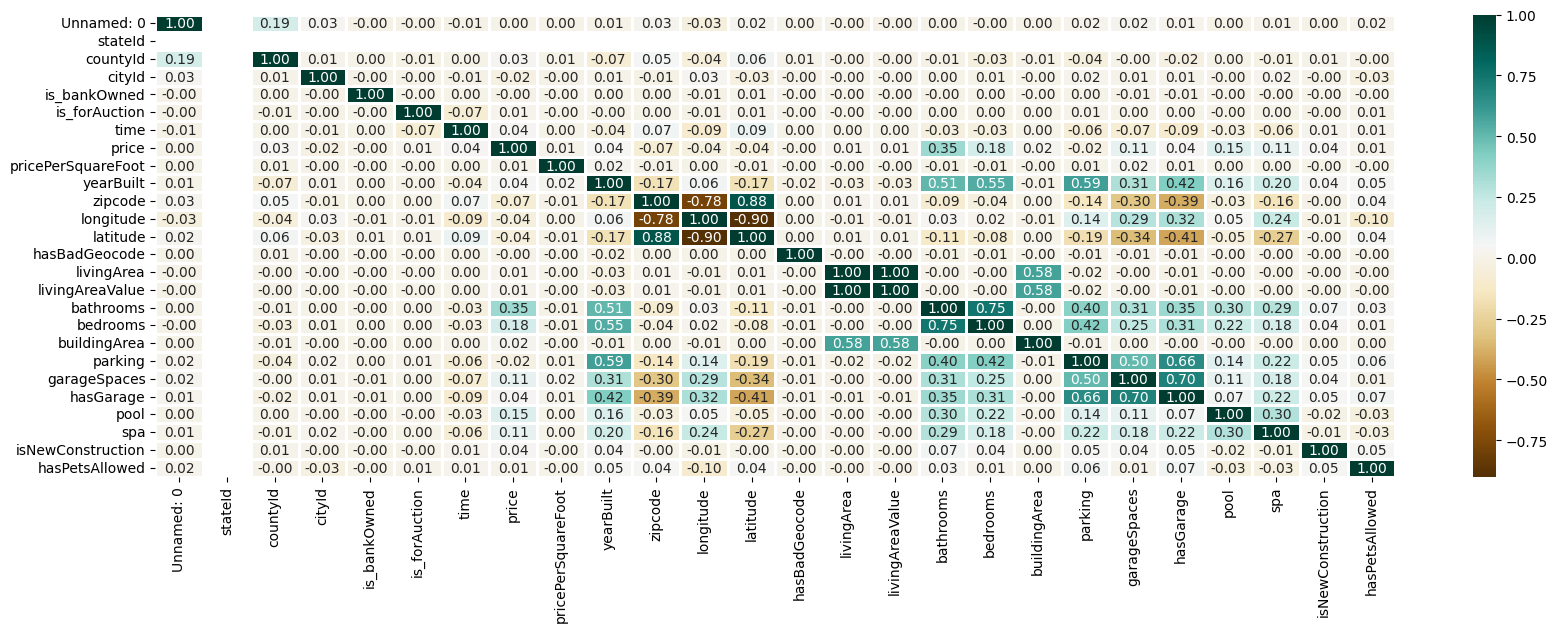

In [88]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(20, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [89]:
dataset_1 =dataset.drop(['Unnamed: 0','id','stateId','countyId','cityId','country','datePostedString','is_bankOwned','is_forAuction','event','time','description','hasBadGeocode','currency',],axis=1)
dataset_1



,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,zipcode,longitude,latitude,livingArea,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,145000.0,0.0,Gold Run,CA,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0.0,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,675000.0,404.0,Pinole,CA,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,1671.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,649000.0,459.0,Pinole,CA,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,1414.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,599000.0,448.0,Pinole,CA,1908,2391 Plum St,94564.0,-122.289230,38.004395,1336.0,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,299000.0,0.0,Pinole,CA,0,2693 Appian Way,94564.0,-122.298439,37.986309,0.0,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,3360000.0,0.0,Los Angeles,CA,1927,736 S Cloverdale Ave,90036.0,-118.346329,34.061150,0.0,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35385,1699000.0,958.0,Los Angeles,CA,1924,937 Masselin Ave,90036.0,-118.354790,34.058182,1774.0,...,1,2.0,1,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35386,1450000.0,2984.0,Santa Cruz,CA,1900,115 Clinton St,95062.0,-122.009361,36.971745,486.0,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County
35387,1495000.0,789.0,Santa Cruz,CA,1906,415 Caledonia St,95062.0,-122.014374,36.975323,1896.0,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County


In [90]:
dataset_1.shape


(35389, 25)

In [91]:
dataset_1.isnull().sum()


,0
price,0
pricePerSquareFoot,0
city,0
state,0
yearBuilt,0
streetAddress,1
zipcode,25
longitude,0
latitude,0
livingArea,0


In [92]:
import seaborn as sns

<Axes: >

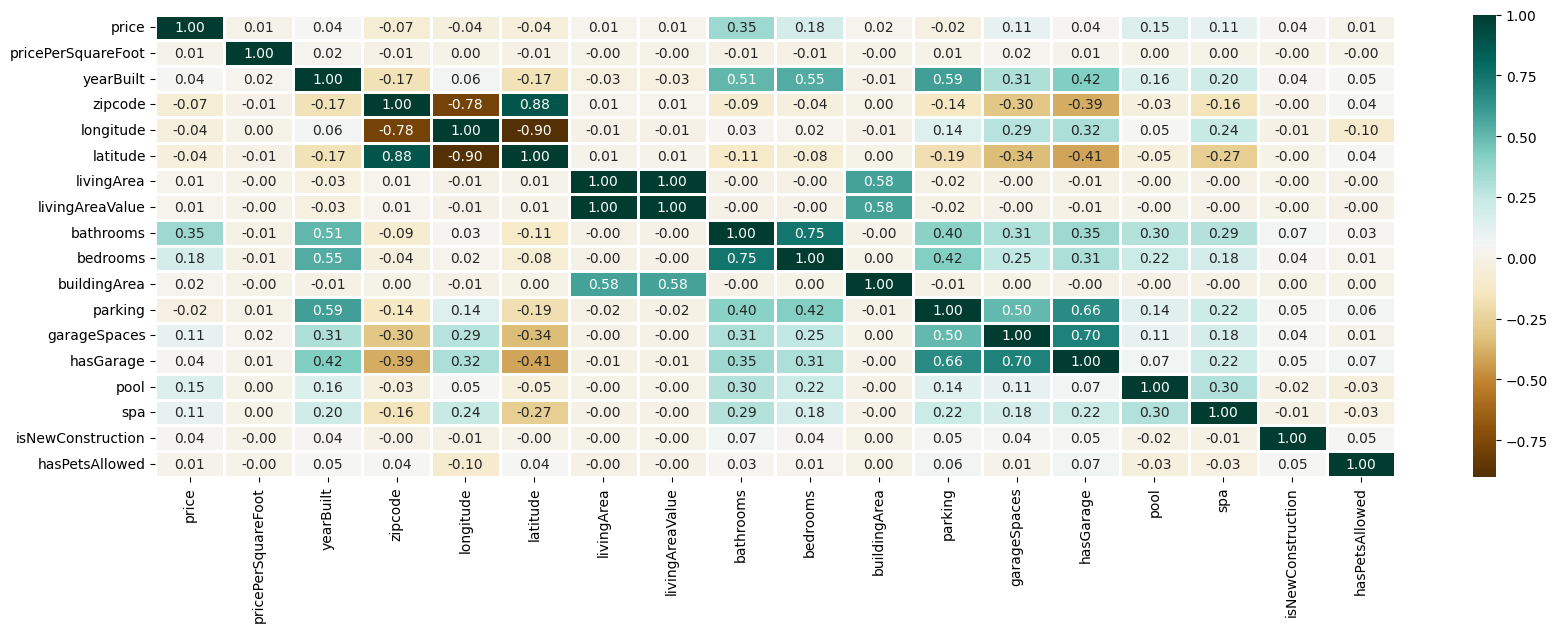

In [93]:
numerical_dataset = dataset_1.select_dtypes(include=['number'])

plt.figure(figsize=(20, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)